In [1]:
#for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

Here, a private dataset is used for classification

In [2]:
path = r"/kaggle/input/cldphy-data/Step-1-20230121T171240Z-001/Step-1/images"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
monitors = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpeg'):
          # adds only the image files to the flowers list
            monitors.append(file.name)

In [3]:
print(monitors[:10])

['medicakolkata_ccu1_mon--3_2022_6_20_21_0_26.jpeg', 'medicakolkata_ccu3_mon--1_2022_5_30_15_2_26.jpeg', 'medicakolkata_ccu3_mon--6_2022_6_8_8_3_31.jpeg', 'medicakolkata_ccu2_mon--1_2022_6_8_23_6_21.jpeg', 'medicakolkata_ccu2_mon--6_2022_6_8_9_7_13.jpeg', 'medicakolkata_rcu_mon--8_2022_5_30_10_5_26.jpeg', 'medicakolkata_ccu2_mon--7_2022_5_30_4_6_38.jpeg', 'medicakolkata_rcu_mon--8_2022_6_20_22_4_31.jpeg', 'medicakolkata_ccu1_mon--10_2022_6_8_15_1_40.jpeg', 'medicakolkata_ccu2_mon--2_2022_6_8_7_6_12.jpeg']


In [4]:
# load the image as a 224x224 array
img = load_img(monitors[0], target_size=(224,224))
# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)

(224, 224, 3)


In [5]:
reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)

(1, 224, 224, 3)


In [6]:
x = preprocess_input(reshaped_img)

In [7]:
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

2023-02-14 17:22:26.679283: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-14 17:22:26.782806: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-14 17:22:26.783542: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-14 17:22:26.785182: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

553476096/553467096 [==============================] - 3s 0us/step


In [8]:
features = model.predict(x)
print(features.shape)

2023-02-14 17:22:34.185949: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-02-14 17:22:35.328266: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


(1, 4096)


In [9]:
features

array([[0.       , 0.       , 1.3076196, ..., 0.       , 0.       ,
        3.9874346]], dtype=float32)

In [10]:
# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [11]:
data = {}
for monitor in monitors:
    
    # try to extract the features and update the dictionary
    
    feat = extract_features(monitor,model)
    data[monitor] = feat
    
    
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
feat = feat.reshape(-1,4096)


In [12]:
pca = PCA(n_components=50, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [13]:
kmeans = KMeans(n_clusters=11, random_state=22)
kmeans.fit(x)

KMeans(n_clusters=11, random_state=22)

In [14]:
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [15]:
for i in range(0,11) :
    print(len(groups[i]))

74
270
270
223
100
84
51
135
305
281
207


In [16]:
folder_path = '/kaggle/input/cldphy-data/Step-1-20230121T171240Z-001/Step-1/images'

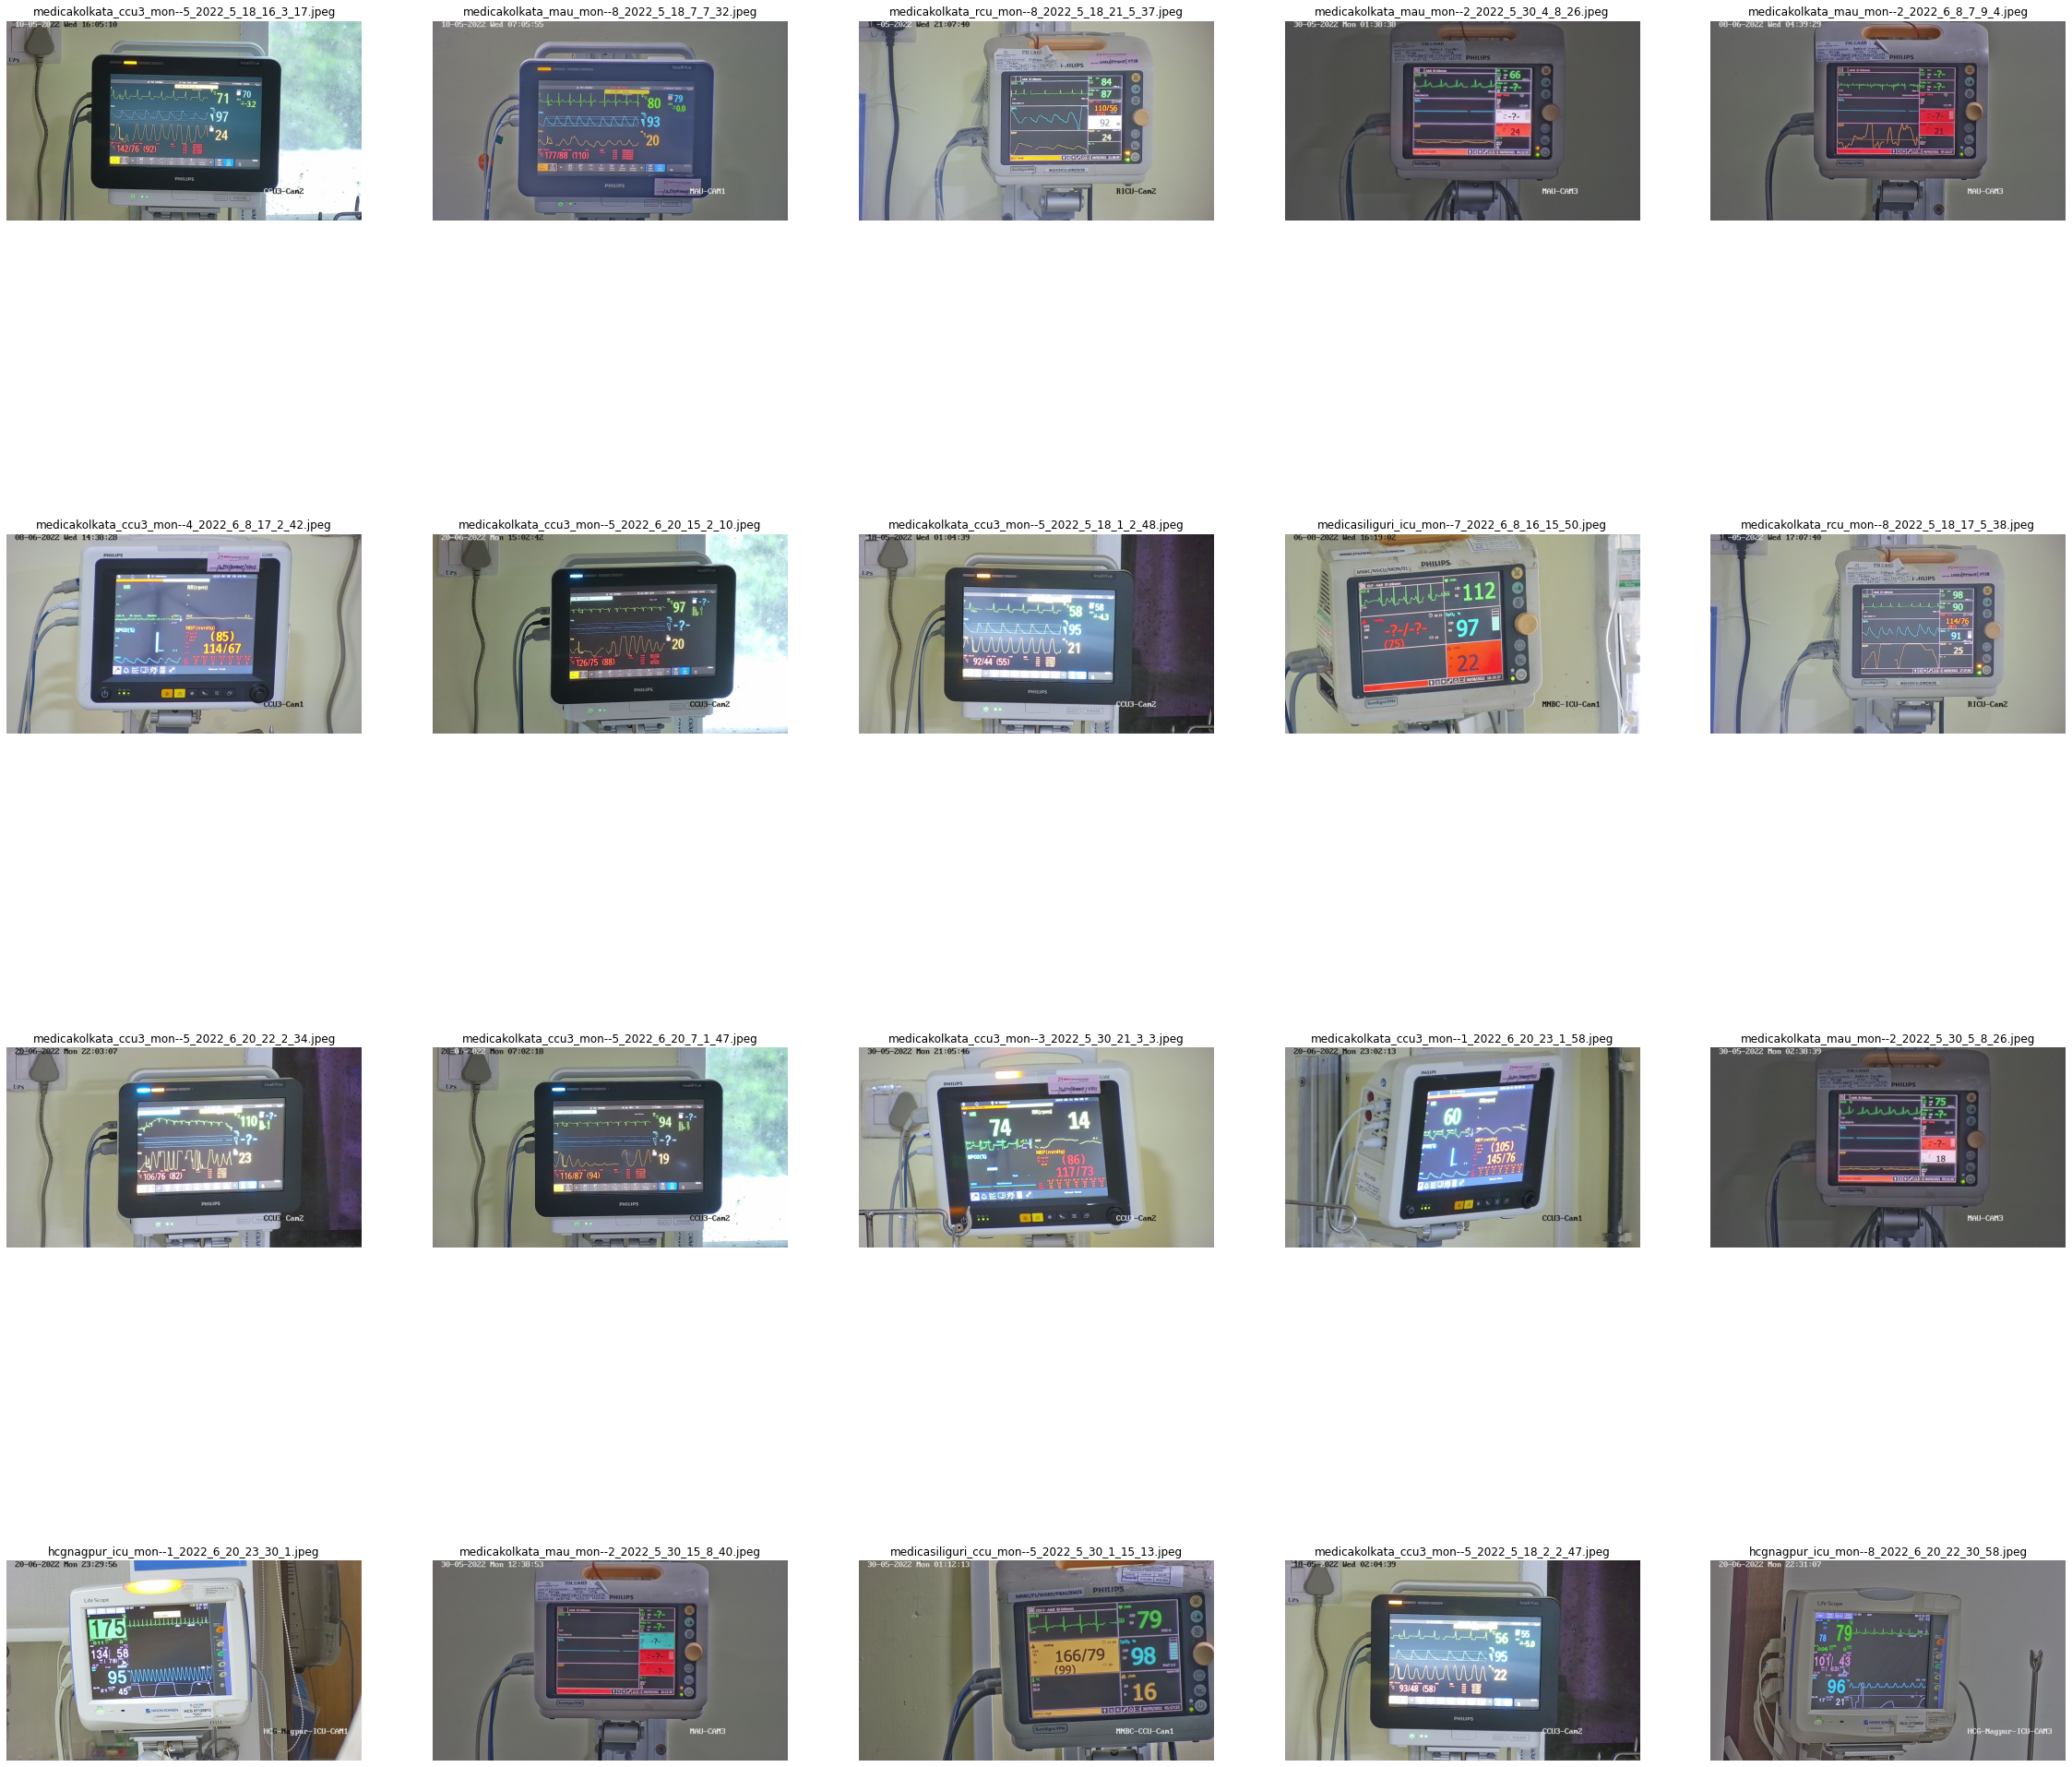

In [17]:
import random
import matplotlib.pyplot as plt
import numpy as np

# List of image names
image_list = groups[1]

# Select 20 random images
random_images = random.sample(image_list, 20)

# Create a figure to hold the subplots
fig, axs = plt.subplots(4,5, figsize=(40, 40))
axs = axs.ravel()

# Iterate through the random images
for i, image_name in enumerate(random_images):
    # Read the image
    img = plt.imread('/kaggle/input/cldphy-data/Step-1-20230121T171240Z-001/Step-1/images/' + image_name)

    # Show the image
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(image_name)

plt.subplots_adjust(hspace=0.1)
plt.show()